***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [4]:
import pandas as pd

In [78]:
df = pd.read_csv('dados.csv')

In [6]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1.2 Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [7]:
#Ano Estudo
sorted(df['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [8]:
# UF
sorted(df['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [9]:
# Sexo
sorted(df['Sexo'].unique())

[0, 1]

In [10]:
# Cor
sorted(df['Cor'].unique())

[0, 2, 4, 6, 8]

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [11]:
# Idade
print('De %s até %s anos' % (df.Idade.min(), df.Idade.max()))

De 13 até 99 anos


#### <font color='red'>Observação</font>
***
> A variável idade pode ser classificada de três formas distintas:
> 1. <b>QUANTITATIVA DISCRETA</b> - quando representa anos completos (números inteiros);
> 2. <b>QUANTITATIVA CONTÍNUA</b> - quando representa a idade exata, sendo representado por frações de anos; e
> 3. <b>QUALITATIVA ORDINAL</b> - quando representa faixas de idade.

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [12]:
# Altura
print('De %s até %s metros' % (df.Altura.min(), df.Altura.max()))

De 1.339244614 até 2.028496765 metros


### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

# <font color=green>2 DISTRIBUIÇÃO DE FREQUÊNCIAS</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [13]:
df["Sexo"].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [14]:
df["Sexo"].value_counts(normalize=True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [15]:
freq = df["Sexo"].value_counts()

In [16]:
percent = df["Sexo"].value_counts(normalize=True) * 100

In [17]:
dist_freq_quality = pd.DataFrame({
    'Frequencia' : freq,
    'Porcentagem': percent,
})

In [18]:
dist_freq_quality.rename_axis('Sexo', axis='columns', inplace=True)
dist_freq_quality.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace=True)
dist_freq_quality

Sexo,Frequencia,Porcentagem
Masculino,53250,69.299844
Feminino,23590,30.700156


In [19]:
dados = pd.DataFrame({'Profissão': [1, 2, 3, 1, 2, 2, 2, 3, 3, 2, 1, 3]})

In [20]:
frequencia = dados['Profissão'].value_counts()
percentual = dados['Profissão'].value_counts(normalize = True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename(index = {1: 'Estatístico', 2: 'Cientista de Dados', 3: 'Programador Python'}, inplace = True)
dist_freq_qualitativas.rename_axis('Profissão', axis= 'columns', inplace = True)
dist_freq_qualitativas

Profissão,Frequência,Porcentagem (%)
Cientista de Dados,5,41.666667
Programador Python,4,33.333333
Estatístico,3,25.000000


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [21]:
sexo = {0:'Masculino',
        1:'Feminino'}
cor = {0:'Indígena',
    2:'Branca',
    4:'Preta',
    6:'Amarela',
    8:'Parda',
    9:'Sem declaração'}

In [22]:
frequencia = pd.crosstab(df.Sexo, df.Cor)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [23]:
frequencia = pd.crosstab(df.Sexo, df.Cor, normalize=True) * 100
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [24]:
# Cruza a tabela de frequencia da Cor com a média de Renda respectiva
frequencia = pd.crosstab(df.Sexo, 
                         df.Cor, 
                         aggfunc='mean',
                         values=df.Renda)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


In [25]:
df.Renda.max()

200000

In [26]:
classes = [0,1576,3152,7880,15760,200000]

In [27]:
labels = ['E','D','C','B','A']

### Passo 2 - Criar a tabela de frequências

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [33]:
frequency = pd.value_counts(
        pd.cut(x = df.Renda,
                bins = classes,
                labels = labels,
                include_lowest = True)
        )
frequency

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [34]:
percent = pd.value_counts(
            pd.cut(x = df.Renda,
                    bins = classes,
                    labels = labels,
                    include_lowest = True),
            normalize=True
            )
percent

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

In [39]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequency, 
    'Porcentagem (%)': percent})
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


In [41]:
dist_freq_quantitativas_personalizadas.sort_index(ascending=False)

,Frequência,Porcentagem (%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [42]:
import numpy as np

### Passo 1 - Difinindo o número de classes

#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [45]:
n = df.shape[0]
n

76840

In [46]:
k = 1 + (10/3) * np.log10(n)
k

17.285291187298853

In [47]:
k = round(k)
k

17

### Passo 2 - Criar a tabela de frequências

In [53]:
f = pd.value_counts(
    pd.cut(
        x = df.Renda,
        bins = k,
        include_lowest = True
    ),
    sort = False
)
f

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [54]:
p = pd.value_counts(
    pd.cut(
        x = df.Renda,
        bins = k,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)
p

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

In [58]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': f, 
    'Porcentagem (%)': p})

dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


## <font color=green>2.4 Histograma</font>
***

O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

### Importando a biblioteca

https://seaborn.pydata.org/

In [59]:
import seaborn as sns; sns.set()

<AxesSubplot:title={'center':'Distribuicao de Frequenticas - Altura'}, xlabel='Metros', ylabel='Count'>

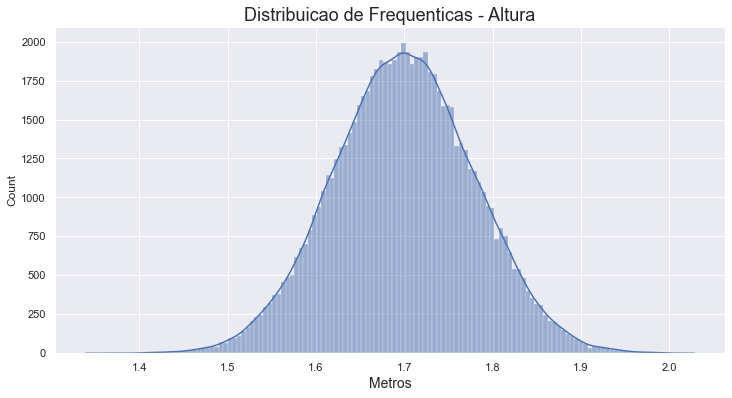

In [63]:
ax = sns.histplot(df.Altura, kde = True)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuicao de Frequenticas - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot:>

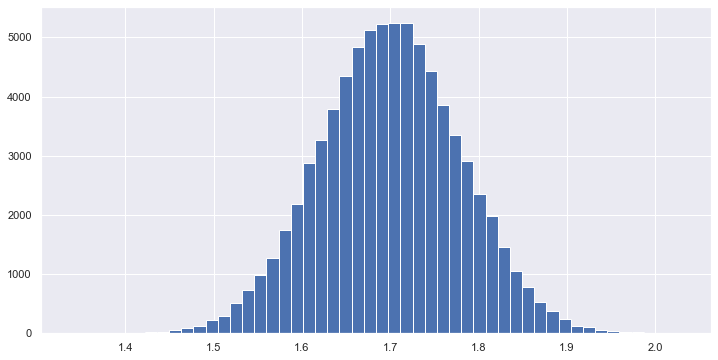

In [66]:
df.Altura.hist(bins=50, figsize=(12,6))

<AxesSubplot:>

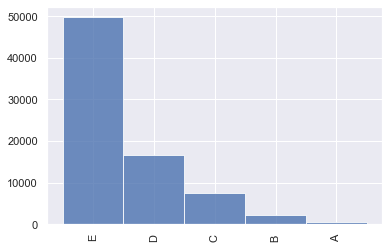

In [71]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width=1, alpha=0.8)

# <font color=green>3 MEDIDAS DE TENDÊNCIA CENTRAL</font>
***

## DataFrame de exemplo

In [81]:
df2 = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df2.rename_axis('Matérias', axis = 'columns', inplace = True)
df2

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## <font color=green>3.1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

In [82]:
df2.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

## <font color=green>3.2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

### Obtendo a mediana em nosso dataset

In [79]:
df.Renda.median()

1200.0

In [80]:
df.Renda.quantile()

1200.0

## <font color=green>3.3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

In [84]:
df2.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [85]:
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 6])

In [86]:
exemplo.mode()

0    2
1    4
2    6
dtype: int64

### Obtendo a moda em nosso dataset

In [88]:
df.Renda.mode()

0    788
dtype: int64

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avaliando a variável RENDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


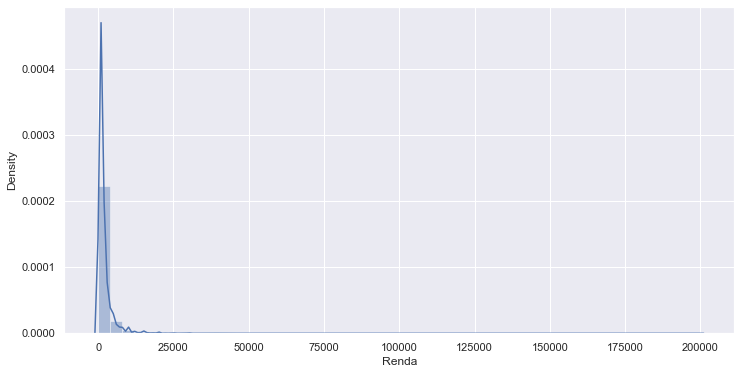

In [95]:
ax = sns.distplot(df.Renda)
ax.figure.set_size_inches(12, 6);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


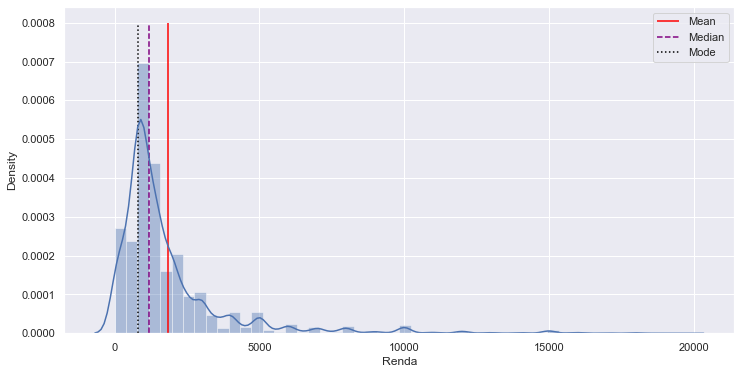

In [109]:
ax = sns.distplot(df.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax.vlines(df.query('Renda < 20000').Renda.mean(), ymin=0,ymax=0.0008, color='red', label='Mean')
ax.vlines(df.query('Renda < 20000').Renda.median(), ymin=0,ymax=0.0008, color='purple', label='Median', linestyles='dashed')
ax.vlines(df.query('Renda < 20000').Renda.mode(), ymin=0,ymax=0.0008, color='black', label='Mode', linestyles='dotted')
ax.legend()

***

### Avaliando a variável ALTURA

In [113]:
Moda = df.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [114]:
Mediana = df.Altura.median()
Mediana

1.6993247325

In [115]:
Media = df.Altura.mean()
Media

1.6995124540575812

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Anos de Estudo', ylabel='Density'>

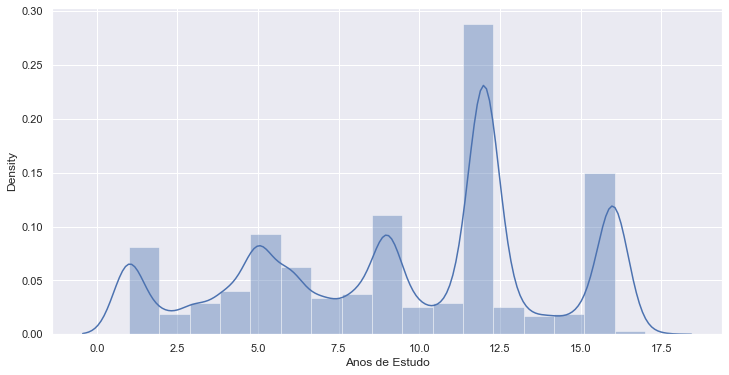

In [117]:
ax = sns.distplot(df['Anos de Estudo'], bins = 17)
ax.figure.set_size_inches(12, 6)
ax

***

### Avaliando a variável ANOS DE ESTUDO

In [118]:
Moda = df['Anos de Estudo'].mode()
Moda

0    12
dtype: int64

In [119]:
Mediana = df['Anos de Estudo'].median()
Mediana

11.0

In [120]:
Media = df['Anos de Estudo'].mean()
Media

9.469664237376367

# <font color=green>4 MEDIDAS SEPARATRIZES</font>
***

## <font color=green>4.1 Quartis, decis e percentis</font>
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

In [121]:
df.Renda.quantile()

1200.0

In [122]:
df.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [123]:
df.Renda.quantile([i / 10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [124]:
df.Renda.quantile([i / 100 for i in range(1, 99)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.94     5400.0
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
Name: Renda, Length: 98, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


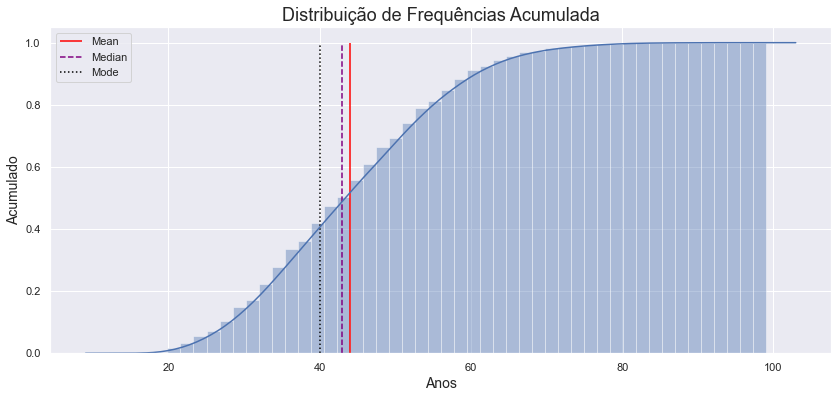

In [127]:
ax = sns.distplot(df.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax.vlines(df.Idade.mean(), ymin=0,ymax=1, color='red', label='Mean')
ax.vlines(df.Idade.median(), ymin=0,ymax=1, color='purple', label='Median', linestyles='dashed')
ax.vlines(df.Idade.mode(), ymin=0,ymax=1, color='black', label='Mode', linestyles='dotted')
ax.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Anos')

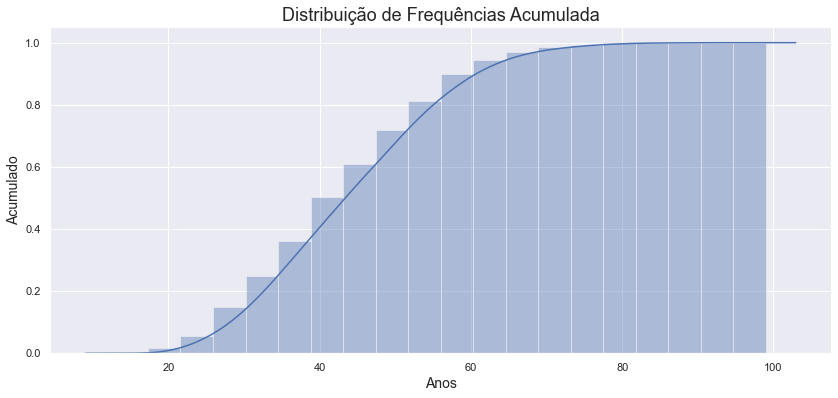

In [130]:
ax = sns.distplot(df.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True},
                  bins = 20)
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)


## <font color=green>4.2 Box-plot</font>
***

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

Text(0.5, 0, 'Metros')

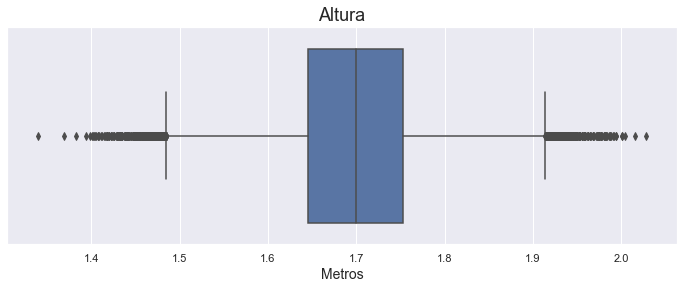

In [131]:
ax = sns.boxplot( x = 'Altura', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

Text(0.5, 0, 'Metros')

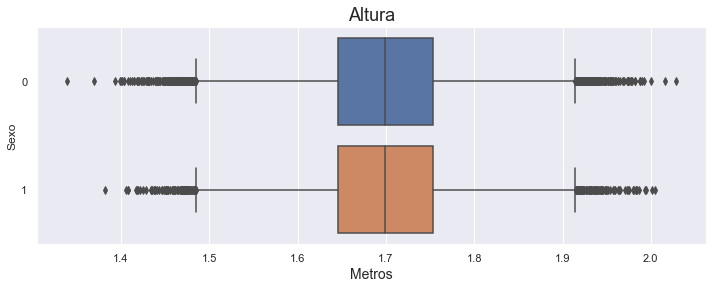

In [132]:
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

Text(0.5, 0, 'R$')

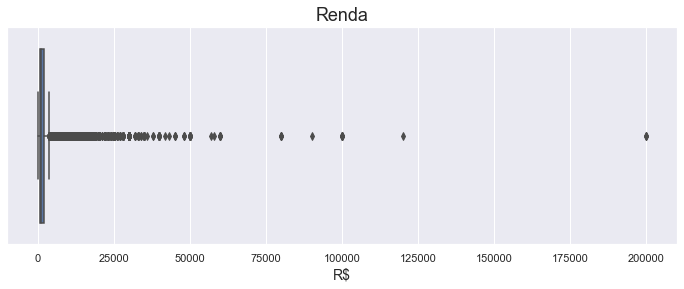

In [133]:
ax = sns.boxplot( x = 'Renda', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

Text(0.5, 0, 'R$')

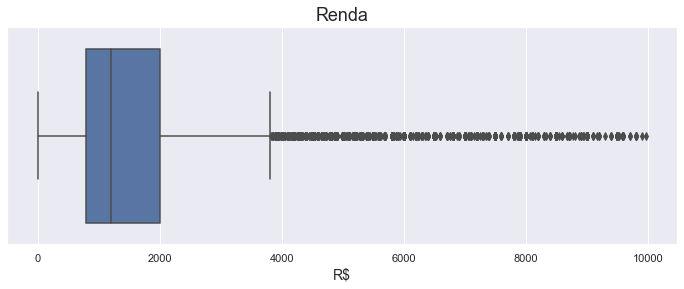

In [134]:
ax = sns.boxplot( x = 'Renda', data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

Text(0.5, 0, 'R$')

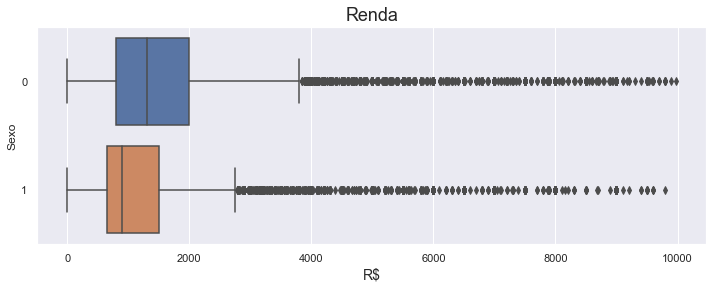

In [135]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

Text(0.5, 0, 'Anos')

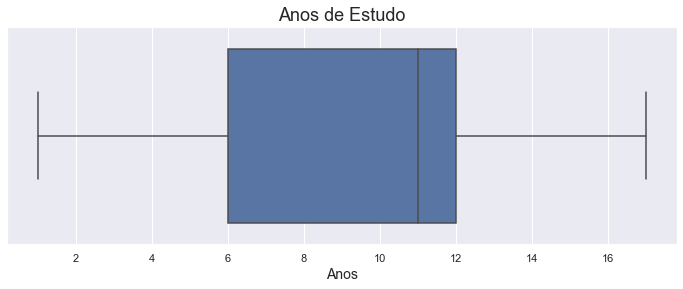

In [137]:
ax = sns.boxplot( x = 'Anos de Estudo', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)

Text(0.5, 0, 'Anos')

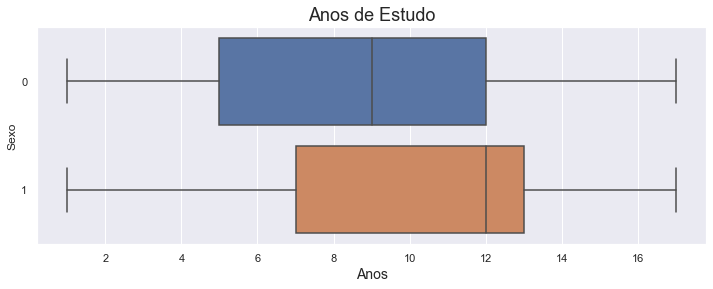

In [138]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)


<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# <font color=green>5 MEDIDAS DE DISPERSÃO</font>
***

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

## <font color=green>5.1 Desvio médio absoluto</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [140]:
df2.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [141]:
notas_fulano = df2['Fulano']
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [142]:
notas_fulano = df2[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [143]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [144]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

<ipython-input-144-e2160f3efa0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [145]:
notas_fulano['Desvio'].sum()

-8.881784197001252e-16

In [146]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


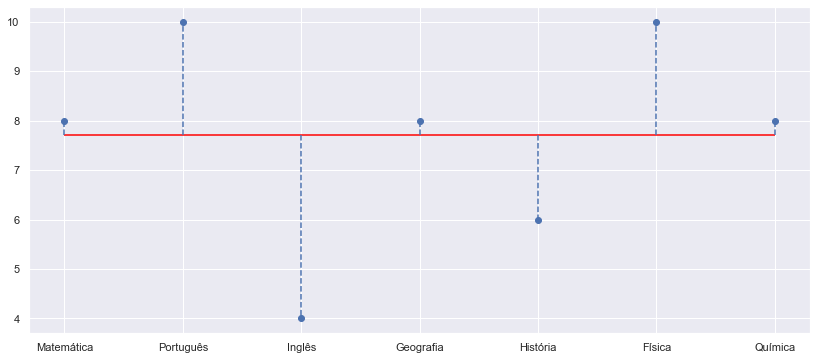

In [148]:
ax = notas_fulano['Fulano'].plot(style = 'o')
ax.figure.set_size_inches(14, 6)
ax.hlines(y = nota_media_fulano, xmin = 0, xmax = notas_fulano.shape[0] - 1, colors = 'red')
for i in range(notas_fulano.shape[0]):
    ax.vlines(x = i, ymin = nota_media_fulano, ymax = notas_fulano['Fulano'][i], linestyle='dashed')

In [149]:
desvio_medio_absoluto = notas_fulano['Fulano'].mad()
desvio_medio_absoluto

1.5510204081632648

In [152]:
pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química']).\
rename_axis('Matérias', axis = 'columns').mad()

Matérias
Fulano     1.551020
Sicrano    0.469388
dtype: float64

## <font color=green>5.2 Variância</font>
***

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [153]:
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [154]:
notas_fulano['(Desvio)^2'].sum() / (len(notas_fulano) - 1)

4.57142857142857

In [155]:
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

## <font color=green>5.3 Desvio padrão</font>
***

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [156]:
np.sqrt(variancia)

2.1380899352993947

In [157]:
desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao

2.1380899352993947

In [158]:
df2.std()

Matérias
Fulano      2.138090
Beltrano    4.460141
Sicrano     0.566947
dtype: float64